In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from terra_modules.terra_utils import get_graph_metrics

## Parameters

In [2]:
# Dataset Graph EU - Extra EU
# dataset = "Extra"

# Dataset Graph EU - World
dataset = "Intra"

# Monthly data  
frequency = "month"

# Quarterly data
# frequency = "quarter"

start_date = "2022-01"
end_date   = "2022-12"

# Products Graph EU - Extra EU
# https://api.terra.istat.it/cls/productsExtra?lang=en

# Products Graph EU - World
# https://api.terra.istat.it/cls/productsIntra?lang=en

# Means of transport Graph EU - Extra EU
# https://api.terra.istat.it/cls/transports?lang=en


# Base payload
base_payload = {
    "tg_perc": "80",
    "listaMezzi": [0, 1, 2, 3, 4, 5, 7, 8, 9], # means of transport
    "product": "TOT",
    "flow": 1, #import = 1, #export = 2
    "weight_flag": True,
    "pos": "None",
    "selezioneMezziEdges": "None"
}


## Get graph metrics from TERRA endpoints, then build the metrics dataframe

In [3]:
df_metrics = get_graph_metrics(dataset, base_payload, start_date, end_date, frequency)

Retrieving Intra data
Endpoint: https://api.terra.istat.it/graph/graphIntraMonth
Time points: ['202201', '202202', '202203', '202204', '202205', '202206', '202207', '202208', '202209', '202210', '202211', '202212']
Starting data retrieval...
   Retrieving data for month 202201
   Retrieving data for month 202202
   Retrieving data for month 202203
   Retrieving data for month 202204
   Retrieving data for month 202205
   Retrieving data for month 202206
   Retrieving data for month 202207
   Retrieving data for month 202208
   Retrieving data for month 202209
   Retrieving data for month 202210
   Retrieving data for month 202211
   Retrieving data for month 202212
... done!


In [4]:
df_metrics.head()

,country,degree_centrality,vulnerability,exportation_strength,hubness,period
0,NL,0.82,0.44,0.099286,0.694444,202201
1,DE,1.18,0.24,0.156718,0.847458,202201
2,CN,0.34,0.00,0.121247,0.602410,202201
3,FR,0.70,0.52,0.052174,0.649351,202201
4,BE,0.58,0.62,0.059914,0.632911,202201


In [5]:
df_metrics.shape

(662, 6)

In [20]:
countries = df_metrics["country"].unique()

In [21]:
display(countries)

array(['US', 'ES', 'FR', 'RU', 'QA', 'IT', 'BE', 'NG', 'DZ', 'HR', 'PT',
       'GR', 'EG', 'AO', 'NL', 'GQ', 'GB', 'LT', 'TT', 'NO', 'BG'],
      dtype=object)

In [4]:
df_country_metrics = df_metrics[df_metrics["country"]=="RU"]

In [5]:
df_country_metrics.head(12)

,country,degree_centrality,vulnerability,exportation_strength,hubness,period
13,RU,0.280000,0.0,0.046314,0.581395,202201
65,RU,0.306122,0.0,0.046614,0.590361,202202
113,RU,0.269231,0.0,0.044201,0.571429,202203
169,RU,0.259259,0.0,0.041693,0.568421,202204
224,RU,0.232143,0.0,0.034083,0.549020,202205
280,RU,0.222222,0.0,0.033035,0.556701,202206
335,RU,0.185185,0.0,0.030648,0.540000,202207
393,RU,0.192982,0.0,0.027809,0.537736,202208
454,RU,0.181818,0.0,0.022698,0.539216,202209
515,RU,0.200000,0.0,0.022992,0.544554,202210


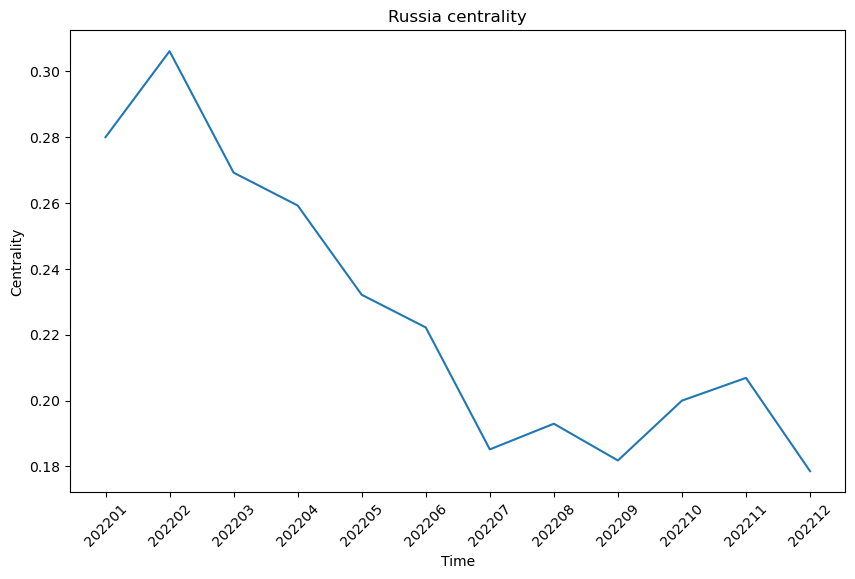

In [6]:
plt.figure(figsize=(10,6))
plt.plot(df_country_metrics["period"], df_country_metrics["degree_centrality"])
plt.title('Russia centrality')
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Centrality')
plt.show()